In [1]:
#Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import yfinance as yf
%matplotlib inline

In [2]:
# List of company tickers
company_tickers = ['AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOGL', 'TSLA', 'GOOG', 'BRK-B', 'META', 'UNH'] 

# List to store institutional holder information
institutional_holders_list = []

In [3]:
for ticker in company_tickers:
    company = yf.Ticker(ticker)
    
    # Extracting institutional holder data for specific companies
    institutional_holders = company.institutional_holders.reset_index()
    
    # Add a 'Company' column to identify the company
    institutional_holders['Company'] = ticker
    
    # Append the institutional holder data to the list
    institutional_holders_list.append(institutional_holders)

In [4]:
# Concat all institutional holder data into a single DataFrame
df_institutional_holders = pd.concat(institutional_holders_list, ignore_index=True)

df_institutional_holders

,index,Holder,Shares,Date Reported,% Out,Value,Company
0,0,Vanguard Group Inc,1299997133,2023-09-29,0.0836,254422447627,AAPL
1,1,Blackrock Inc.,1031407553,2023-09-29,0.0663,201856779122,AAPL
2,2,"Berkshire Hathaway, Inc",915560382,2023-09-29,0.0589,179184328508,AAPL
3,3,State Street Corporation,569291690,2023-09-29,0.0366,111416080472,AAPL
4,4,"FMR, LLC",298321726,2023-09-29,0.0192,58384546998,AAPL
...,...,...,...,...,...,...,...
95,5,Price (T.Rowe) Associates Inc,26758148,2023-09-29,0.0289,14710827548,UNH
96,6,"Wellington Management Group, LLP",25220234,2023-09-29,0.0273,13865328538,UNH
97,7,JP Morgan Chase & Company,23323618,2023-09-29,0.0252,12822625923,UNH
98,8,"Geode Capital Management, LLC",17869985,2023-09-29,0.0193,9824382002,UNH


In [5]:
p = nx.from_pandas_edgelist(df_institutional_holders,'Holder', 'Company')
p

In [6]:
p.nodes()

NodeView(('Vanguard Group Inc', 'AAPL', 'Blackrock Inc.', 'Berkshire Hathaway, Inc', 'State Street Corporation', 'FMR, LLC', 'Geode Capital Management, LLC', 'Price (T.Rowe) Associates Inc', 'Morgan Stanley', 'Northern Trust Corporation', 'Norges Bank Investment Management', 'MSFT', 'JP Morgan Chase & Company', 'Capital World Investors', 'AMZN', 'NVDA', 'GOOGL', 'Wellington Management Group, LLP', 'TSLA', 'GOOG', 'Capital International Investors', 'BRK-B', 'Bill & Melinda Gates Foundation Trust', 'Bank Of New York Mellon Corporation', 'META', 'UNH'))

In [7]:
p.edges()

EdgeView([('Vanguard Group Inc', 'AAPL'), ('Vanguard Group Inc', 'MSFT'), ('Vanguard Group Inc', 'AMZN'), ('Vanguard Group Inc', 'NVDA'), ('Vanguard Group Inc', 'GOOGL'), ('Vanguard Group Inc', 'TSLA'), ('Vanguard Group Inc', 'GOOG'), ('Vanguard Group Inc', 'BRK-B'), ('Vanguard Group Inc', 'META'), ('Vanguard Group Inc', 'UNH'), ('AAPL', 'Blackrock Inc.'), ('AAPL', 'Berkshire Hathaway, Inc'), ('AAPL', 'State Street Corporation'), ('AAPL', 'FMR, LLC'), ('AAPL', 'Geode Capital Management, LLC'), ('AAPL', 'Price (T.Rowe) Associates Inc'), ('AAPL', 'Morgan Stanley'), ('AAPL', 'Northern Trust Corporation'), ('AAPL', 'Norges Bank Investment Management'), ('Blackrock Inc.', 'MSFT'), ('Blackrock Inc.', 'AMZN'), ('Blackrock Inc.', 'NVDA'), ('Blackrock Inc.', 'GOOGL'), ('Blackrock Inc.', 'TSLA'), ('Blackrock Inc.', 'GOOG'), ('Blackrock Inc.', 'BRK-B'), ('Blackrock Inc.', 'META'), ('Blackrock Inc.', 'UNH'), ('State Street Corporation', 'MSFT'), ('State Street Corporation', 'AMZN'), ('State Street

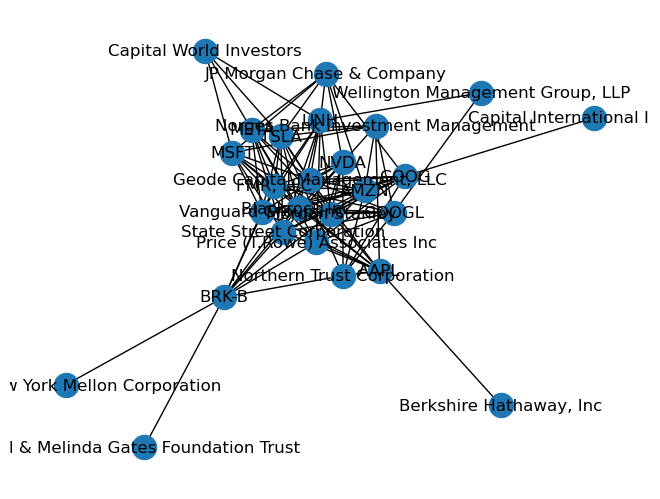

In [8]:
nx.draw(p, with_labels = True)

In [9]:
# add colors
colors=[]
for node in p:
    if node in df_institutional_holders['Company'].values:
        colors.append('magenta')
    else:
            colors.append('lime')

<Figure size 2400x3000 with 0 Axes>

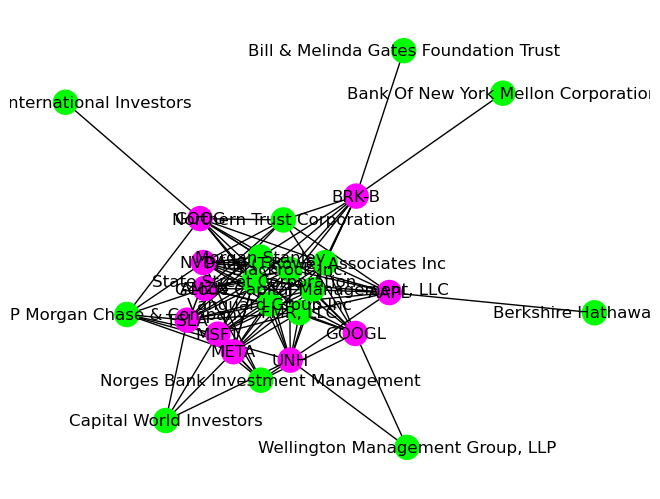

<Figure size 2400x3000 with 0 Axes>

In [10]:
nx.draw(p,with_labels = True, node_color =colors)
plt.figure(figsize=(24,30))

In [11]:
p

In [12]:
nx.average_node_connectivity(p)

5.7846153846153845

In [13]:
nx.average_shortest_path_length(p)

1.9938461538461538

In [14]:
nx.average_neighbor_degree(p)

{'Vanguard Group Inc': 10.0,
 'AAPL': 8.4,
 'Blackrock Inc.': 10.0,
 'Berkshire Hathaway, Inc': 10.0,
 'State Street Corporation': 10.0,
 'FMR, LLC': 10.0,
 'Geode Capital Management, LLC': 10.0,
 'Price (T.Rowe) Associates Inc': 10.0,
 'Morgan Stanley': 10.0,
 'Northern Trust Corporation': 10.0,
 'Norges Bank Investment Management': 10.0,
 'MSFT': 8.7,
 'JP Morgan Chase & Company': 10.0,
 'Capital World Investors': 10.0,
 'AMZN': 9.0,
 'NVDA': 9.0,
 'GOOGL': 8.5,
 'Wellington Management Group, LLP': 10.0,
 'TSLA': 8.5,
 'GOOG': 8.4,
 'Capital International Investors': 10.0,
 'BRK-B': 7.8,
 'Bill & Melinda Gates Foundation Trust': 10.0,
 'Bank Of New York Mellon Corporation': 10.0,
 'META': 8.7,
 'UNH': 8.2}

In [15]:
nx.shortest_path(p, 'UNH', 'META')

['UNH', 'Vanguard Group Inc', 'META']

In [16]:
nx.shortest_path(p, 'UNH', 'TSLA')

['UNH', 'Vanguard Group Inc', 'TSLA']

In [17]:
T= nx.bfs_tree(p, 'META')
list(T.edges())

[('META', 'Vanguard Group Inc'),
 ('META', 'Blackrock Inc.'),
 ('META', 'FMR, LLC'),
 ('META', 'State Street Corporation'),
 ('META', 'Price (T.Rowe) Associates Inc'),
 ('META', 'JP Morgan Chase & Company'),
 ('META', 'Geode Capital Management, LLC'),
 ('META', 'Capital World Investors'),
 ('META', 'Morgan Stanley'),
 ('META', 'Norges Bank Investment Management'),
 ('Vanguard Group Inc', 'AAPL'),
 ('Vanguard Group Inc', 'MSFT'),
 ('Vanguard Group Inc', 'AMZN'),
 ('Vanguard Group Inc', 'NVDA'),
 ('Vanguard Group Inc', 'GOOGL'),
 ('Vanguard Group Inc', 'TSLA'),
 ('Vanguard Group Inc', 'GOOG'),
 ('Vanguard Group Inc', 'BRK-B'),
 ('Vanguard Group Inc', 'UNH'),
 ('AAPL', 'Berkshire Hathaway, Inc'),
 ('AAPL', 'Northern Trust Corporation'),
 ('GOOGL', 'Wellington Management Group, LLP'),
 ('GOOG', 'Capital International Investors'),
 ('BRK-B', 'Bill & Melinda Gates Foundation Trust'),
 ('BRK-B', 'Bank Of New York Mellon Corporation')]

In [18]:
nx.diameter(p)

4

In [19]:
nx.number_connected_components(p)

1

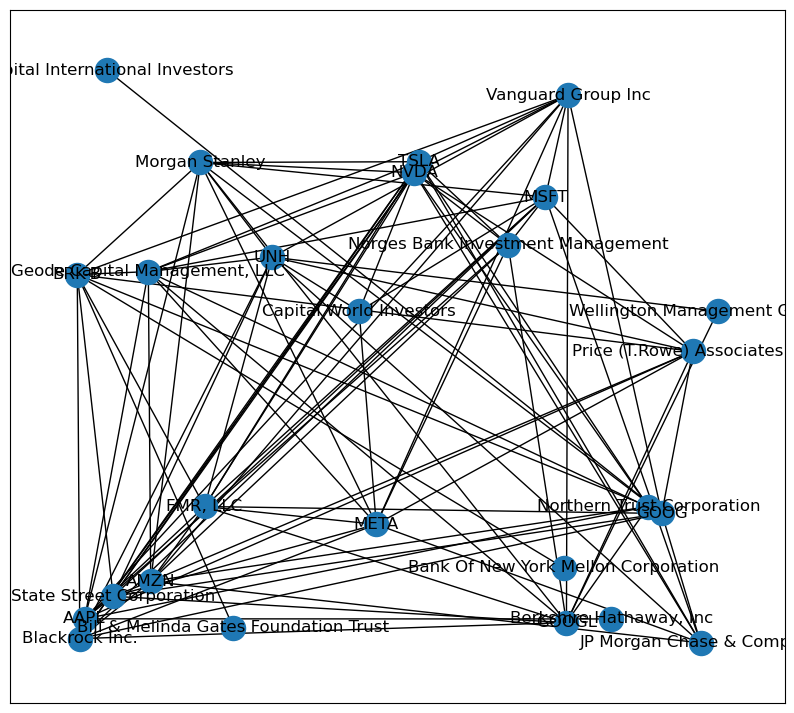

In [21]:
plt.figure(figsize=(10,9))
pos = nx.random_layout(p)
nx.draw_networkx(p, pos)

In [24]:
p1 = nx.from_pandas_edgelist(df_institutional_holders,'Holder', 'Company', ['Value'])
p1

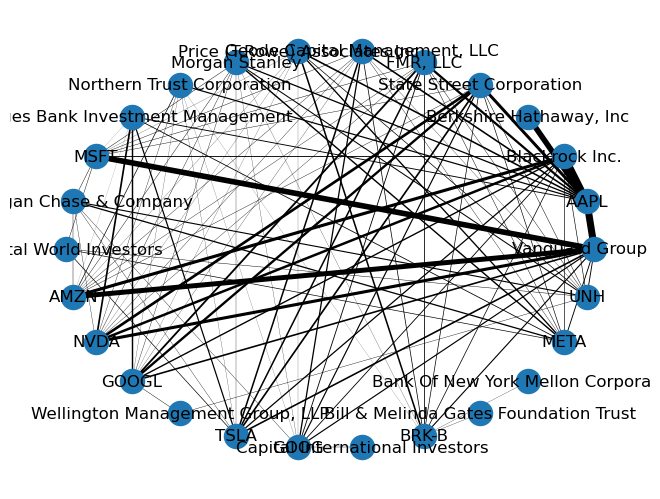

In [36]:
# Convert 'Value' to billions and round to integers for edge thickness
value_in_billions = df_institutional_holders['Value'] / 1e9  
rounded_values = value_in_billions.round(0).astype(int)  

# Set edge thickness based on 'Value' in billion
edge_widths_normalized = [value if value > 0 else 1 for value in rounded_values]  # Set a minimum thickness


pos = nx.circular_layout(p1)  

# Drawing edges with adjusted thickness
nx.draw(p1, pos, with_labels=True, width=scaled_edge_widths)

plt.show()

In [27]:
# adding colors
colors=[]
for node in p1:
    if node in df_institutional_holders['Company'].values:
        colors.append('magenta')
    else:
            colors.append('lime')

<Figure size 2800x3400 with 0 Axes>

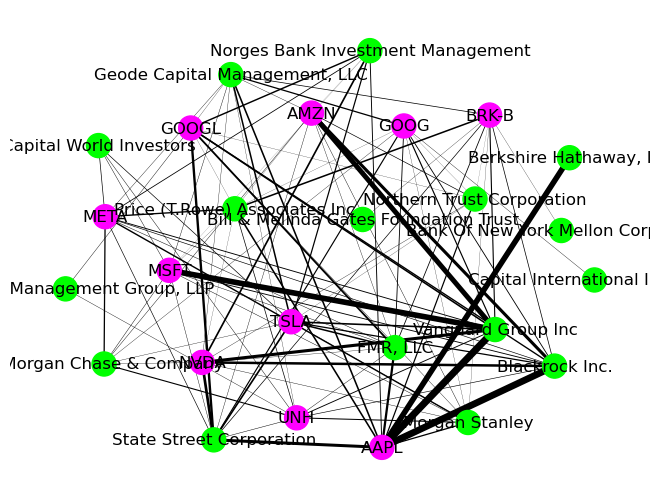

<Figure size 2800x3400 with 0 Axes>

In [30]:
scaled_edge_widths = [width * 0.02 for width in edge_widths_normalized]  # Adjusting our edge width as needed
pos = nx.arf_layout(p1) 
nx.draw(p1, pos, with_labels=True, width=scaled_edge_widths, node_color=colors)
plt.figure(figsize=(28,34))

In [31]:
[x for x in nx.__dir__() if x.endswith('_layout')]

['bipartite_layout',
 'circular_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'planar_layout',
 'fruchterman_reingold_layout',
 'spiral_layout',
 'multipartite_layout',
 'arf_layout']

In [32]:
nx.write_graphml(p1, "fin_graph2.graphml")

In [39]:
# Dict mapping company names to their sectors
company_to_sect = {
    'AAPL': 'Technology',
    'MSFT': 'Technology',
    'AMZN': 'E-Commerce',
    'NVDA': 'Technology',
    'GOOGL' : 'Technology',
    'BRK-B' : 'Financials',
    'META' : 'Technology',
    'UNH' : 'Healthcare'}


sectors = []

# Iterate through rows and fill 'Sector' column based on 'Company' column
for company in df_institutional_holders['Company']:
    # Check if the company exists in the dictionary
    if company in company_to_sect:
        sector = company_to_sect[company]
    else:
        sector = 'Other'  
    sectors.append(sector)

df_institutional_holders['Sector'] = sectors

In [40]:
df_institutional_holders.head()

,index,Holder,Shares,Date Reported,% Out,Value,Company,Sector
0,0,Vanguard Group Inc,1299997133,2023-09-29,0.0836,254422447627,AAPL,Technology
1,1,Blackrock Inc.,1031407553,2023-09-29,0.0663,201856779122,AAPL,Technology
2,2,"Berkshire Hathaway, Inc",915560382,2023-09-29,0.0589,179184328508,AAPL,Technology
3,3,State Street Corporation,569291690,2023-09-29,0.0366,111416080472,AAPL,Technology
4,4,"FMR, LLC",298321726,2023-09-29,0.0192,58384546998,AAPL,Technology


C:\Users\avera\AppData\Local\Temp\ipykernel_38312\2257279138.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}B'.format(yval / 1e9) for yval in plt.gca().get_yticks()])


[Text(0, 0.0, '0B'),
 Text(0, 200000000000.0, '200B'),
 Text(0, 400000000000.0, '400B'),
 Text(0, 600000000000.0, '600B'),
 Text(0, 800000000000.0, '800B'),
 Text(0, 1000000000000.0, '1000B'),
 Text(0, 1200000000000.0, '1200B')]

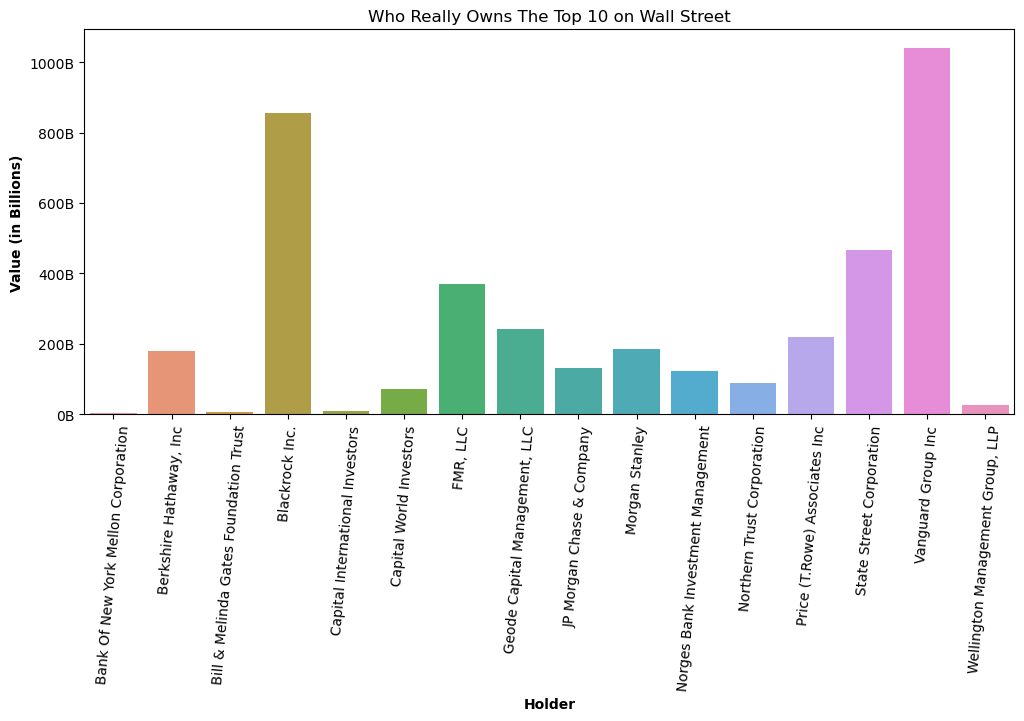

In [59]:
import seaborn as sns
Richest_On_Wallstreet = df_institutional_holders.groupby('Holder')['Value'].sum()

plt.figure(figsize= (12,5))
sns.barplot(x=Richest_On_Wallstreet.index, y=Richest_On_Wallstreet.values)

# Setting my y-axis labels in billions
plt.title('Who Really Owns The Top 10 on Wall Street')
plt.xlabel('Holder', fontweight ='bold')
plt.ylabel('Value (in Billions)',  fontweight ='bold')
plt.xticks(rotation='vertical')
plt.xticks(rotation=85)
# Converting y-axis labels to display values in billions
plt.gca().set_yticklabels(['{:.0f}B'.format(yval / 1e9) for yval in plt.gca().get_yticks()])

(-1.0999897792745277,
 1.0999995114086052,
 -1.0999999685974102,
 1.09999999459716)

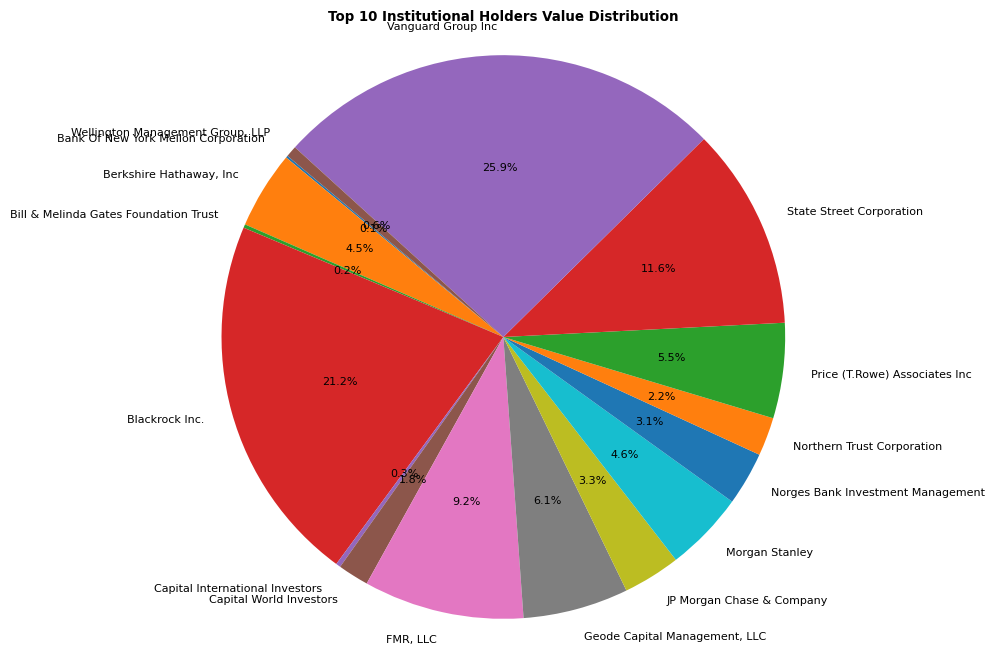

In [64]:
plt.rcParams['font.size'] = 8
plt.figure(figsize=(8, 8))
plt.pie(Richest_On_Wallstreet.values, labels=Richest_On_Wallstreet.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Institutional Holders Value Distribution', fontweight = 'bold')
plt.axis('equal')

In [1]:
folder_path = '/Users/avera/OneDrive/Desktop/BIA658 project'
file_name = 'Fin Network Analysis.csv'

In [ ]:
combined.to_csv(f'{folder_path}/{file_name}', index=False)